# 2.7 pandas

# 1 overview

1. Pandas is a package of fast, efficient **data analysis tools** for Python.
   - Its popularity has surged in recent years, coincident with the rise of fields, such as data science and machine learning.
   - Here's a popularity comparison over time against STATA, SAS, and dplyr courtesy (**PI1: a link?**) of Stack Overflow Trends (**PI2: a link?**).
2. Just as **NumPy** provides the **basic array data type plus core array operations**, pandas
   - defines **fundamental structures for working with data** and
   - endows them with **methods that facilitate operations**, such as
     - reading in data
     - adjusting indices
     - working with dates and time series
     - sorting, grouping, re-ordering and general data munging
     - dealing with missing values, etc.
3. More sophisticated statistical functionality is left to other packages, such as **statsmodels and scikit-learn**, which are built on top of pandas.
   - This lecture will provide a basic introduction to pandas.
   - Throughout the lecture, we will assume that the following imports have taken place.

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import requests
!pip install pandas-datareader

     |████████████████████████████████| 112kB 3.9MB/s eta 0:00:01


# 2 series

1. Two important data types defined by pandas are `Series` and `DataFrame`.
   - A `Series` can be thought of as a "column" of data, such as a collection of observations on a single variable.
     - e.g., see Program 1.
       - Here, we can imagine the indices `0, 1, 2, 3` as indexing four listed companies, and the values being daily returns on their shares.
     - Pandas `Series` are (**PI: is**) built on top of NumPy arrays and support many similar operations, see Programs 2-3.
     - But `Series` provide(**PI: s**) more than NumPy arrays.
       - Not only do they have some additional (statistically oriented) methods, see Program 4.
       - But their indices are more flexible, see Program 5.
     - Viewed in this way, `Series` are like fast, efficient Python dictionaries (with the restriction that the items in the dictionary all have the same type--in this case, floats).
       - In fact, we can use much of the same syntax as Python dictionaries, see Program 6.
   - A `DataFrame` is an object for storing related columns of data.

In [5]:
# Program 1

s = pd.Series(np.random.randn(4), name='daily returns')
s

0   -2.215974
1   -0.242642
2   -0.748642
3   -2.048090
Name: daily returns, dtype: float64

In [6]:
# Program 2: scalar multiplication

s * 100

0   -221.597383
1    -24.264183
2    -74.864171
3   -204.808991
Name: daily returns, dtype: float64

In [7]:
# Program 3: absolute value function

np.abs(s)

0    2.215974
1    0.242642
2    0.748642
3    2.048090
Name: daily returns, dtype: float64

In [8]:
# Program 4

s.describe()

count    4.000000
mean    -1.313837
std      0.969516
min     -2.215974
25%     -2.090061
50%     -1.398366
75%     -0.622142
max     -0.242642
Name: daily returns, dtype: float64

In [9]:
# Program 5

s.index = ['AMZN', 'AAPL', 'MSFT', 'GOOG']
s

AMZN   -2.215974
AAPL   -0.242642
MSFT   -0.748642
GOOG   -2.048090
Name: daily returns, dtype: float64

In [10]:
# Program 6

s['AMZN']

-2.2159738298576315

In [12]:
# Program 7

s['AMZN'] = 0
s

AMZN    0.000000
AAPL   -0.242642
MSFT   -0.748642
GOOG   -2.048090
Name: daily returns, dtype: float64

In [15]:
# Program 7

'AAPL' in s

True

# 3 dataframes

1. While a `Series` is a single column of data, a `DataFrame` is several columns, one for each variable.
   - In essence, a `DataFrame` in pandas is analogous to a (high optimized) Excel spreadsheet.
     - It is a powerful tool for representing and analyzing data that are naturally organized into rows and columns.
       - Often with descriptive  indexes for individual rows and individual columns.
2. Let's look at an example that reads data from the CSV file `test_pwt.csv`.
   - Supposing we have this data saved as `test_pwt.csv` (**PI3: add ` `**) in the present working directory (type `%pwd` in Jupyter to see what it is), it can be read in as Program 1-2.
   - We can select particular rows using standard Python array slicing notation, see Program 3.
   - To select columns, we can pass a list containing the names of the desired columns represented as strings, see Program 4.
   - To select both rows and columns using integers, the `iloc` attribute should be used with the format `.iloc[row, columns`, see Program 5.
   - To select rows and columns using a mixture of integers and labels, the `loc` attribute can be used in a similar way, see Program 6.
3. Let's imagine that we're only interested in population and total GDP (`tcgdp`).
   - One way to strip the data frame `df` down to only these variable is to overwrite the dataframe using the selection method described above, see Program 7.
   - Here the index `0, 1, \dots, 7` is redundant because we can use the country names as an index.
     - To do this, we set the index to be the `country` variable in the dataframe, see Program 8.
   - Let's give the columns slightly better names, see Program 9.
   - Population is in thousands, let's revert to single units, see Program 10.
4. Next, we are going to add a column showing real GDP per capita, multiplying by $1,000,000$ as we go because total GDP is in millions, see Program 11.

5. One of the nice things about pandas `DataFrame` and `Series` objects is that they have methods for plotting and visualization that work through Matplotlib.
   - e.g., we can easily generate a bar plot of GDP per capita, see Program 12.
     - At the moment, the data frame is ordered alphabetically on the countries.
   - Let's change it to GDP per capita, see Program 13.
     - i.e., it is ordered descending by GDP per capita.
   - Plotting as before now yields Program 14.

In [17]:
# Program 1
df = pd.read_csv('https://github.com/QuantEcon/QuantEcon.lectures.code/raw/master/pandas/data/test_pwt.csv')
type(df)

pandas.core.frame.DataFrame

In [18]:
# Program 2

df

,country,country isocode,year,POP,XRAT,tcgdp,cc,cg
0,Argentina,ARG,2000,37335.653,0.999500,2.950722e+05,75.716805,5.578804
1,Australia,AUS,2000,19053.186,1.724830,5.418047e+05,67.759026,6.720098
2,India,IND,2000,1006300.297,44.941600,1.728144e+06,64.575551,14.072206
3,Israel,ISR,2000,6114.570,4.077330,1.292539e+05,64.436451,10.266688
4,Malawi,MWI,2000,11801.505,59.543808,5.026222e+03,74.707624,11.658954
5,South Africa,ZAF,2000,45064.098,6.939830,2.272424e+05,72.718710,5.726546
6,United States,USA,2000,282171.957,1.000000,9.898700e+06,72.347054,6.032454
7,Uruguay,URY,2000,3219.793,12.099592,2.525596e+04,78.978740,5.108068


In [19]:
# Program 3

df[2:5]

,country,country isocode,year,POP,XRAT,tcgdp,cc,cg
2,India,IND,2000,1006300.297,44.941600,1.728144e+06,64.575551,14.072206
3,Israel,ISR,2000,6114.570,4.077330,1.292539e+05,64.436451,10.266688
4,Malawi,MWI,2000,11801.505,59.543808,5.026222e+03,74.707624,11.658954


In [20]:
# Program 4

df[['country', 'tcgdp']]

,country,tcgdp
0,Argentina,2.950722e+05
1,Australia,5.418047e+05
2,India,1.728144e+06
3,Israel,1.292539e+05
4,Malawi,5.026222e+03
5,South Africa,2.272424e+05
6,United States,9.898700e+06
7,Uruguay,2.525596e+04


In [21]:
# Program 5

df.iloc[2:5, 0:4]

,country,country isocode,year,POP
2,India,IND,2000,1006300.297
3,Israel,ISR,2000,6114.570
4,Malawi,MWI,2000,11801.505


In [22]:
# Program 6

df.loc[df.index[2:5], ['country', 'tcgdp']]

,country,tcgdp
2,India,1.728144e+06
3,Israel,1.292539e+05
4,Malawi,5.026222e+03


In [23]:
# Program 7

df = df[['country', 'POP', 'tcgdp']]
df

,country,POP,tcgdp
0,Argentina,37335.653,2.950722e+05
1,Australia,19053.186,5.418047e+05
2,India,1006300.297,1.728144e+06
3,Israel,6114.570,1.292539e+05
4,Malawi,11801.505,5.026222e+03
5,South Africa,45064.098,2.272424e+05
6,United States,282171.957,9.898700e+06
7,Uruguay,3219.793,2.525596e+04


In [24]:
# Program 8

df = df.set_index('country')
df

,POP,tcgdp
country,,
Argentina,37335.653,2.950722e+05
Australia,19053.186,5.418047e+05
India,1006300.297,1.728144e+06
Israel,6114.570,1.292539e+05
Malawi,11801.505,5.026222e+03
South Africa,45064.098,2.272424e+05
United States,282171.957,9.898700e+06
Uruguay,3219.793,2.525596e+04


In [25]:
# Program 9

df.columns = 'population', 'total GDP'
df

,population,total GDP
country,,
Argentina,37335.653,2.950722e+05
Australia,19053.186,5.418047e+05
India,1006300.297,1.728144e+06
Israel,6114.570,1.292539e+05
Malawi,11801.505,5.026222e+03
South Africa,45064.098,2.272424e+05
United States,282171.957,9.898700e+06
Uruguay,3219.793,2.525596e+04


In [26]:
# Program 10

df['population'] = df['population'] * 1e3
df

,population,total GDP
country,,
Argentina,3.733565e+07,2.950722e+05
Australia,1.905319e+07,5.418047e+05
India,1.006300e+09,1.728144e+06
Israel,6.114570e+06,1.292539e+05
Malawi,1.180150e+07,5.026222e+03
South Africa,4.506410e+07,2.272424e+05
United States,2.821720e+08,9.898700e+06
Uruguay,3.219793e+06,2.525596e+04


In [27]:
# Program 11

df['GDP percap'] = df['total GDP'] * 1e6 /df['population']
df

,population,total GDP,GDP percap
country,,,
Argentina,3.733565e+07,2.950722e+05,7903.229085
Australia,1.905319e+07,5.418047e+05,28436.433261
India,1.006300e+09,1.728144e+06,1717.324719
Israel,6.114570e+06,1.292539e+05,21138.672749
Malawi,1.180150e+07,5.026222e+03,425.896679
South Africa,4.506410e+07,2.272424e+05,5042.647686
United States,2.821720e+08,9.898700e+06,35080.381854
Uruguay,3.219793e+06,2.525596e+04,7843.970620


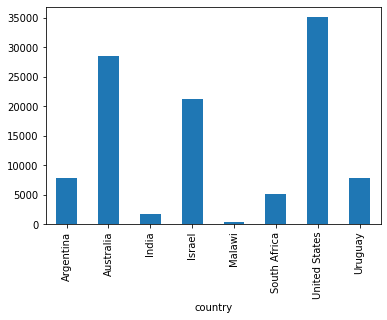

In [28]:
# Program 12

df['GDP percap'].plot(kind='bar')
plt.show()

In [31]:
# Program 13

df = df.sort_values(by='GDP percap', ascending=False)
df

,population,total GDP,GDP percap
country,,,
United States,2.821720e+08,9.898700e+06,35080.381854
Australia,1.905319e+07,5.418047e+05,28436.433261
Israel,6.114570e+06,1.292539e+05,21138.672749
Argentina,3.733565e+07,2.950722e+05,7903.229085
Uruguay,3.219793e+06,2.525596e+04,7843.970620
South Africa,4.506410e+07,2.272424e+05,5042.647686
India,1.006300e+09,1.728144e+06,1717.324719
Malawi,1.180150e+07,5.026222e+03,425.896679


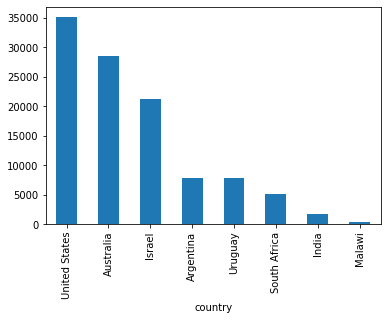

In [32]:
# Program 14

df['GDP percap'].plot(kind='bar')
plt.show()

# 4 on-line data sources

1. Python makes it straightforward to query online databases programmatically.
   - An important database for economists is FRED.
     - A vast collection of time series data maintained by the St. Louis Fed.
   - e.g., suppose that we are interested in the unemployment rate.
     - Via FRED, the entire series for the US civilian unemployment rate can be downloaded directly by entering this URL into our browser.
       - `https://research.stlouisfed.org/fred2/series/UNRATE/downloaddata/UNRATE.csv`
       - This request returns a CSV file, which will be handled by our default application for this class of files.
       - Alternatively, we can access the CSV file from within a Python program, as what we did in Program 1 of section 3.
         - This can be done with a variety of methods (**PI4: e.g.?**)
         - We start with a relatively low-level method and then return to pandas.
     

## 4.1 accessing data with requests

1. One option is to use requests, a standard Python library for requesting data over the Internet.
   - To begin, try the code in Program 1 on our computer.
   - If there's no error message, then the call has succeeded.
   - If we do get an error, then there are two likely causes.
     - We are not connected to the Internet.
     - Our machine is accessing the Internet through a proxy server, and Python isn't aware of this.
       - If so, then we can either
         - switch to another machine, or
         - solve our proxy problem by reading the documentations.
2. Assuming that all is working, we can now proceed to use the `source` object returned by the call in Program 1, see Program 2-4.
3. We could now write some additional code to parse this text and store it as an array.
   - But this is unnecessary, since pandas' `read_csv` function can handle the task for us, see Program 5.
     - We use `parse_dates=True` so that pandas recognizes our dates columns, allowing for simple date filtering.
   - The data has been read into a pandas DataFrame called `data` that we can now manipulate in the usual way, see Program 6.
   - Note that pandas offers many **other file type alternatives**.(**PI5:?**)
   - Pandas has a widely variety of top-level methods that we can use to read, excel, json, parquet or plug straight into a database server. (**PI6:?**)

In [38]:
# Program 1: PI7
url = 'http://research.stlouisfed.org/fred2/series/UNRATE/downloaddata/UNRATE.csv'
r = requests.get(url)

In [39]:
# Program 2

source = r.content.decode().split("\n")
source[0]

'DATE,VALUE\r'

In [36]:
# Program 3

source[1]

'1948-01-01,3.4\r'

In [37]:
# Program 4

source[2]

'1948-02-01,3.8\r'

In [40]:
# Program 5 PI8:

data = pd.read_csv(url, index_col=0, parse_dates=True)

In [41]:
# Program 6

type(data)

pandas.core.frame.DataFrame

In [42]:
# program 7: A useful method to get a quick look at a data frame

data.head()

,VALUE
DATE,
1948-01-01,3.4
1948-02-01,3.8
1948-03-01,4.0
1948-04-01,3.9
1948-05-01,3.5


In [43]:
# Program 8: our output might differ slightly

pd.set_option('precision', 1)
data.describe()

,VALUE
count,864.0
mean,5.7
std,1.6
min,2.5
25%,4.5
50%,5.5
75%,6.8
max,10.8


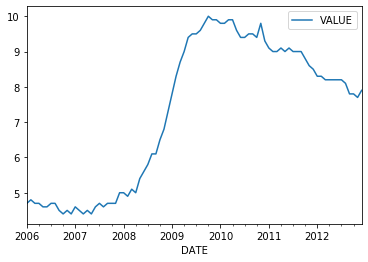

In [45]:
# Program 9: We can also plot the unemployment rate from 2006 to 2012

data['2006':'2012'].plot()
plt.show()

## 4.2 using pandas_datareader to access data

1. The maker of pandas has also authored a library called pandas_datareader (**PI9: attach a link?**) that gives programmatic access to many data sources straight from the Jupyter notebook.
   - While some sources require an access key, many of the most important (e.g., FRED, OECD, EUROSTAT and the World Bank (**PI10: attach a link?**)) are free to use.
   - For now(**PI: ,**) let's work through one example of downloading and plotting data: the World Bank.
     - The World Bank collects and organizes data on a huge range of indicators.
       - e.g., here's some data on government debt as a ratio to GDP.
         - Program 10 fetches the data for us and plots time series for the US and Australia.
   - The documentation provides more details on how to access various data sources.

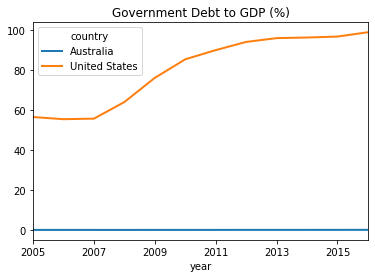

In [51]:
# Program 10
# PI11: an error exists: no module named this; solved by `!pip install pandas=datareader`
from pandas_datareader import wb 

govt_debt = wb.download(indicator='GC.DOD.TOTL.GD.ZS', country=['US', 'AU'], start=2005, end=2016).stack().unstack(0)
ind = govt_debt.index.droplevel(-1)
govt_debt.index = ind

ax = govt_debt.plot(lw=2)
plt.title("Government Debt to GDP (%)")
plt.show()

# 5 exercises

PI12: add labels; simplify the code

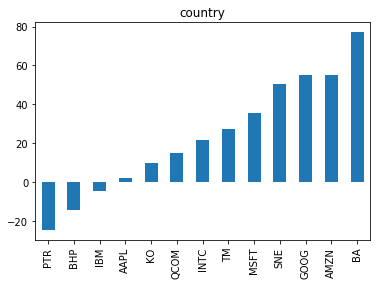

In [129]:
ticker_list = {'INTC': 'Intel',
               'MSFT': 'Microsoft',
               'IBM': 'IBM',
               'BHP': 'BHP',
               'TM': 'Toyota',
               'AAPL': 'Apple',
               'AMZN': 'Amazon',
               'BA': 'Boeing',
               'QCOM': 'Qualcomm',
               'KO': 'Coca-Cola',
               'GOOG': 'Google',
               'SNE': 'Sony',
               'PTR': 'PetroChina'}

url2 = 'https://python.quantecon.org/_static/lecture_specific/pandas/data/ticker_data.csv'
data = pd.read_csv(url2)
data = data[ticker_list]
data = data.T
data = data[[0, 251]]
data.columns = 'Day1', 'Day365'
data['Price Change (%)'] =(data['Day365'] - data['Day1']) * 100 / data['Day1']
data = data.sort_values(by='Price Change (%)', ascending=True)
data['Price Change (%)'].plot(kind='bar', title='country')
plt.show()

In [116]:
ticker_list = {'INTC': 'Intel',
               'MSFT': 'Microsoft',
               'IBM': 'IBM',
               'BHP': 'BHP',
               'TM': 'Toyota',
               'AAPL': 'Apple',
               'AMZN': 'Amazon',
               'BA': 'Boeing',
               'QCOM': 'Qualcomm',
               'KO': 'Coca-Cola',
               'GOOG': 'Google',
               'SNE': 'Sony',
               'PTR': 'PetroChina'}

In [117]:
url2 = 'https://python.quantecon.org/_static/lecture_specific/pandas/data/ticker_data.csv'
data = pd.read_csv(url2)
data

,Date,INTC,MSFT,IBM,BHP,TM,AAPL,AMZN,BA,QCOM,KO,GOOG,SNE,PTR
0,2013-01-02,21.4,27.6,196.4,79.9,96.0,549.0,257.3,77.1,64.8,37.6,723.3,11.5,145.8
1,2013-01-03,21.3,27.2,195.3,79.0,95.4,542.1,258.5,77.5,64.4,37.6,723.7,11.5,145.8
2,2013-01-04,21.2,26.7,194.0,79.4,97.3,527.0,259.1,77.7,63.5,37.7,738.0,11.1,145.6
3,2013-01-07,21.2,26.7,193.1,79.7,95.5,523.9,268.5,76.1,64.0,37.3,734.8,11.0,142.9
4,2013-01-08,21.1,26.5,192.9,78.5,93.9,525.3,266.4,74.1,63.9,37.0,733.3,10.7,141.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,2013-12-24,25.4,37.1,183.2,67.1,118.6,567.7,399.2,136.8,73.0,40.2,1111.8,17.5,109.7
248,2013-12-26,25.7,37.4,185.4,66.8,121.7,563.9,404.4,138.3,73.5,40.5,1117.5,17.3,109.5
249,2013-12-27,25.6,37.3,185.1,67.4,121.9,560.1,398.1,136.9,73.8,40.7,1118.4,17.1,110.0
250,2013-12-30,25.9,37.3,186.4,67.7,121.4,554.5,393.4,135.9,73.6,41.1,1109.5,17.5,109.7


In [118]:
data = data[ticker_list]
data

,INTC,MSFT,IBM,BHP,TM,AAPL,AMZN,BA,QCOM,KO,GOOG,SNE,PTR
0,21.4,27.6,196.4,79.9,96.0,549.0,257.3,77.1,64.8,37.6,723.3,11.5,145.8
1,21.3,27.2,195.3,79.0,95.4,542.1,258.5,77.5,64.4,37.6,723.7,11.5,145.8
2,21.2,26.7,194.0,79.4,97.3,527.0,259.1,77.7,63.5,37.7,738.0,11.1,145.6
3,21.2,26.7,193.1,79.7,95.5,523.9,268.5,76.1,64.0,37.3,734.8,11.0,142.9
4,21.1,26.5,192.9,78.5,93.9,525.3,266.4,74.1,63.9,37.0,733.3,10.7,141.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,25.4,37.1,183.2,67.1,118.6,567.7,399.2,136.8,73.0,40.2,1111.8,17.5,109.7
248,25.7,37.4,185.4,66.8,121.7,563.9,404.4,138.3,73.5,40.5,1117.5,17.3,109.5
249,25.6,37.3,185.1,67.4,121.9,560.1,398.1,136.9,73.8,40.7,1118.4,17.1,110.0
250,25.9,37.3,186.4,67.7,121.4,554.5,393.4,135.9,73.6,41.1,1109.5,17.5,109.7


In [119]:
data = data.T
data

,0,1,2,3,4,5,6,7,8,9,...,242,243,244,245,246,247,248,249,250,251
INTC,21.4,21.3,21.2,21.2,21.1,21.5,21.8,22.0,22.0,21.9,...,24.7,25.1,25.1,25.1,25.3,25.4,25.7,25.6,25.9,26.0
MSFT,27.6,27.2,26.7,26.7,26.5,26.7,26.5,26.8,26.9,27.2,...,36.5,36.6,36.2,36.8,36.6,37.1,37.4,37.3,37.3,37.4
IBM,196.4,195.3,194.0,193.1,192.9,192.3,192.9,194.4,192.6,192.5,...,175.8,178.7,180.2,180.0,182.2,183.2,185.4,185.1,186.4,187.6
BHP,79.9,79.0,79.4,79.7,78.5,79.0,78.7,76.7,76.9,76.8,...,63.7,64.7,65.0,66.0,66.3,67.1,66.8,67.4,67.7,68.2
TM,96.0,95.4,97.3,95.5,93.9,95.7,96.9,96.1,96.8,96.4,...,118.6,121.0,118.7,118.8,119.3,118.6,121.7,121.9,121.4,121.9
AAPL,549.0,542.1,527.0,523.9,525.3,517.1,523.5,520.3,501.8,485.9,...,555.0,550.8,544.5,549.0,570.1,567.7,563.9,560.1,554.5,561.0
AMZN,257.3,258.5,259.1,268.5,266.4,266.4,265.3,267.9,272.7,271.9,...,387.6,396.0,395.2,402.2,402.9,399.2,404.4,398.1,393.4,398.8
BA,77.1,77.5,77.7,76.1,74.1,76.8,77.1,75.2,76.6,76.9,...,135.9,135.5,135.2,136.7,136.4,136.8,138.3,136.9,135.9,136.5
QCOM,64.8,64.4,63.5,64.0,63.9,64.9,64.8,64.9,64.2,64.4,...,72.9,73.2,72.4,72.9,72.8,73.0,73.5,73.8,73.6,74.2
KO,37.6,37.6,37.7,37.3,37.0,37.0,37.0,36.9,37.0,37.3,...,39.1,40.0,39.9,40.0,40.2,40.2,40.5,40.7,41.1,41.3


In [120]:
data = data[[0, 251]]
data

,0,251
INTC,21.4,26.0
MSFT,27.6,37.4
IBM,196.4,187.6
BHP,79.9,68.2
TM,96.0,121.9
AAPL,549.0,561.0
AMZN,257.3,398.8
BA,77.1,136.5
QCOM,64.8,74.2
KO,37.6,41.3


In [121]:
data.columns = 'Day1', 'Day365'
data

,Day1,Day365
INTC,21.4,26.0
MSFT,27.6,37.4
IBM,196.4,187.6
BHP,79.9,68.2
TM,96.0,121.9
AAPL,549.0,561.0
AMZN,257.3,398.8
BA,77.1,136.5
QCOM,64.8,74.2
KO,37.6,41.3


In [122]:
data['Price Change (%)'] =(data['Day365'] - data['Day1']) * 1e2 / data['Day1']
data

/Users/shuhu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Day1,Day365,Price Change (%)
INTC,21.4,26.0,21.4
MSFT,27.6,37.4,35.4
IBM,196.4,187.6,-4.5
BHP,79.9,68.2,-14.7
TM,96.0,121.9,27.0
AAPL,549.0,561.0,2.2
AMZN,257.3,398.8,55.0
BA,77.1,136.5,77.1
QCOM,64.8,74.2,14.7
KO,37.6,41.3,9.9


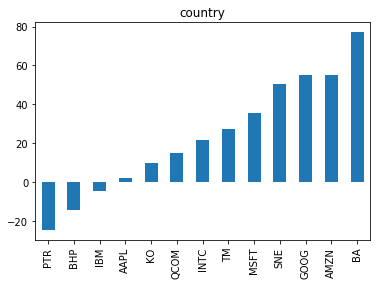

In [127]:
data = data.sort_values(by='Price Change (%)', ascending=True)
data['Price Change (%)'].plot(kind='bar', title='country')
plt.show()